<a href="https://colab.research.google.com/github/ezfesoft/KaotikTabanliSifreleme_Odev_23Ekim/blob/main/GoruntuSifreleme_Odev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÖDEV 1

##  GÖRÜNTÜ ŞİFRELEME TEMELLERİ VE KAOTİK TABANLI GÖRÜNTÜ ŞİFRELEME

### Bilgisayar Mühendisliği Doktora Programı

Python kullanarak verilen Sezar Şifreleme Yöntemi'ni renkli (RGB) bir görüntü üzerinde uygulayan her bir kanal için belirlenen anahtarlar kullanılarak şifreleme işlemi yapılmaktadır.

---

from PIL import Image ifadesi, Python Imaging Library'nin (PIL) bir sürümü olan Pillow kütüphanesinden Image modülünü içe aktarmak için kullanılır. Pillow, Python'da görüntü işleme yapmak için sıkça tercih edilen bir kütüphanedir. Bu kodun belirli işlevleri için Image modülünün kullanılma sebepleri şunlardır:

* Görüntü Dosyasını Yükleme: Image.open() yöntemi ile belirli bir dosya yolunda yer alan görüntü dosyasını programa yükleyebiliriz. Bu sayede, dosya sistemindeki görüntüyle işlem yapma imkanı sağlanır.

* Görüntüyü RGB Formatına Dönüştürme: Image.open("lena.png").convert("RGB") ifadesi, görüntüyü RGB formatına dönüştürür. Bu işlem, her bir kanalın (R, G, B) üzerinde ayrı ayrı çalışmak için gereklidir. RGB formatı, bir renkli görüntünün kırmızı (Red), yeşil (Green) ve mavi (Blue) kanallarına ayrılmasını sağlar.

* NumPy Dizisine Çevirme: Pillow ile yüklenen bir görüntü, NumPy dizisine çevrildiğinde piksellerle doğrudan işlemler yapmak mümkün olur. Bu, Sezar şifreleme gibi piksel bazlı işlemleri kolaylaştırır.

* Şifrelenmiş Görüntüyü Yeniden Oluşturma: Image.fromarray() yöntemi, işlenmiş (şifrelenmiş) görüntü dizisini tekrar görüntü formatına dönüştürmemize olanak tanır. Bu sayede, şifreleme işlemi tamamlanan görüntüyü ekranda gösterme veya dosyaya kaydetme işlemi yapılabilir.

Bu işlevlerin tamamı, görüntü işlemlerini kolaylaştırmak için Pillow kütüphanesindeki Image modülünü kullanarak gerçekleştirilmiştir.

In [6]:
from PIL import Image
import numpy as np

Lena görüntüsünü yükleme ve RGB formatına dönüştürme

In [7]:
image = Image.open("lenna.png").convert("RGB")
image_np = np.array(image)

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]], dtype=uint8)
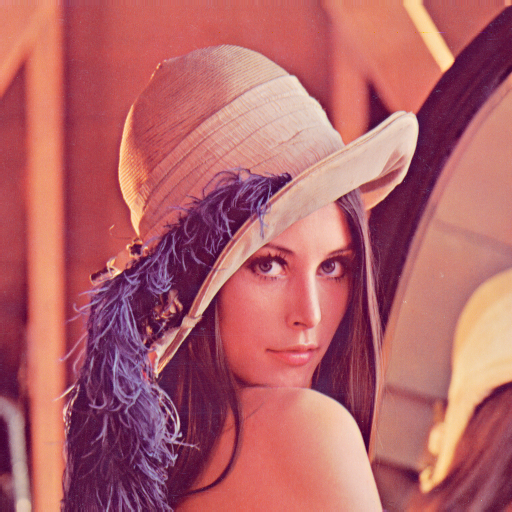

In [8]:
image_np

Şifreleme anahtarlarını tanımlama

In [9]:
shift_R = 50
shift_G = 100
shift_B = 150

Şifreleme İşlemi

R, G, B kanallarını ayrı ayrı kaydırarak şifreleme

In [10]:
encrypted_image = image_np.copy()
encrypted_image[:, :, 0] = np.roll(image_np[:, :, 0], shift_R, axis=1)  # R kanalını sağa 50 kaydır
encrypted_image[:, :, 1] = np.roll(image_np[:, :, 1], shift_G, axis=1)  # G kanalını sağa 100 kaydır
encrypted_image[:, :, 2] = np.roll(image_np[:, :, 2], shift_B, axis=1)  # B kanalını sağa 150 kaydır

array([[[190, 212, 104],
        [200, 213, 117],
        [185, 211, 104],
        ...,
        [191, 207, 112],
        [190, 206, 125],
        [200, 210, 116]],

       [[190, 212, 104],
        [200, 213, 117],
        [185, 211, 104],
        ...,
        [191, 207, 112],
        [190, 206, 125],
        [200, 210, 116]],

       [[190, 212, 104],
        [200, 213, 117],
        [185, 211, 104],
        ...,
        [191, 207, 112],
        [190, 206, 125],
        [200, 210, 116]],

       ...,

       [[135, 104, 175],
        [133,  98, 174],
        [131,  92, 175],
        ...,
        [138, 105, 159],
        [133, 103, 170],
        [138, 103, 169]],

       [[136, 101, 172],
        [134,  97, 179],
        [137,  95, 173],
        ...,
        [142, 106, 164],
        [134, 107, 169],
        [134, 102, 167]],

       [[136, 101, 172],
        [134,  97, 179],
        [137,  95, 173],
        ...,
        [142, 106, 164],
        [134, 107, 169],
        [134, 102, 167]]], dtype=uint8)
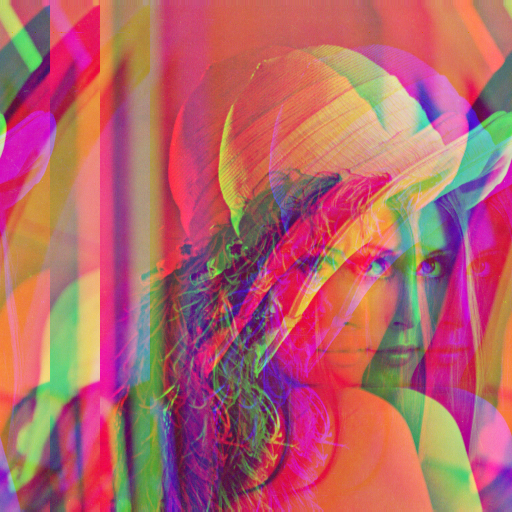

In [11]:
encrypted_image

Şifrelenmiş görüntüyü gösterme

In [12]:
encrypted_img = Image.fromarray(encrypted_image)
encrypted_img.show(title="Şifrelenmiş Görüntü")

Şifre Çözme İşlemi

Her kanalı şifreleme birimleri kadar sola kaydırarak orijinal haline getirme

In [13]:
decrypted_image = encrypted_image.copy()
decrypted_image[:, :, 0] = np.roll(encrypted_image[:, :, 0], -shift_R, axis=1)  # R kanalını sola 50 kaydır
decrypted_image[:, :, 1] = np.roll(encrypted_image[:, :, 1], -shift_G, axis=1)  # G kanalını sola 100 kaydır
decrypted_image[:, :, 2] = np.roll(encrypted_image[:, :, 2], -shift_B, axis=1)  # B kanalını sola 150 kaydır

Şifre çözülmüş görüntüyü gösterme

array([[[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       [[226, 137, 125],
        [226, 137, 125],
        [223, 137, 133],
        ...,
        [230, 148, 122],
        [221, 130, 110],
        [200,  99,  90]],

       ...,

       [[ 84,  18,  60],
        [ 84,  18,  60],
        [ 92,  27,  58],
        ...,
        [173,  73,  84],
        [172,  68,  76],
        [177,  62,  79]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]],

       [[ 82,  22,  57],
        [ 82,  22,  57],
        [ 96,  32,  62],
        ...,
        [179,  70,  79],
        [181,  71,  81],
        [185,  74,  81]]], dtype=uint8)
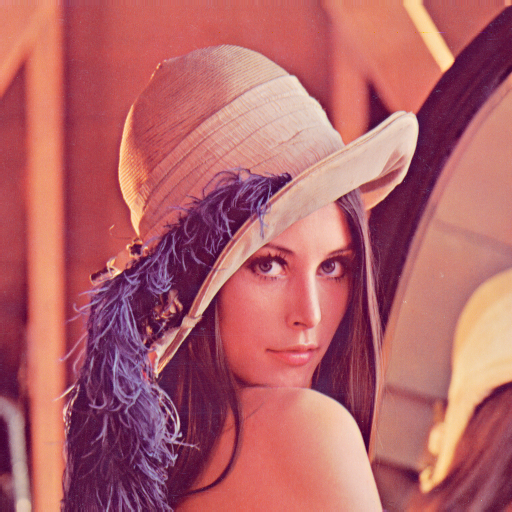

In [14]:
decrypted_image

In [15]:
decrypted_img = Image.fromarray(decrypted_image)
decrypted_img.show(title="Şifre Çözülmüş Görüntü")